In [1]:
import pandas as pd
import numpy as np 
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)



## Note 
- check for duplicates in the id numbers 
    - leave them alone for now even if there are 177 duplicates flucuatio in price might be due to other factors 

https://github.com/ironhack-edu/data_mid_bootcamp_project_regression

saturday after thnks giving weekend 
DECEMBER 4 deadline 
present on the 7th 

- Id: Unique identification number for the property.
- date: date the house was sold.
- price: price of the house.
- waterfront: house which has a view to a waterfront.
- condition: How good the condition is (overall). 1 indicates worn out property and 5 excellent.
- grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- Sqft_above: square footage of house apart from basement.
- Sqft_living15: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- Sqft_lot15: lotSize area in 2015(implies - some renovations).

HOME:looking at property  
dont have to do the sql questions during the presention 
explain your approach 
explain what you did to improve the accuracy of the model  


In [2]:
home = pd.read_excel('regression_data.xls')
home.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1773100755,2014-08-21,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,520000
1,8812401450,2014-12-29,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000
2,5566100170,2014-10-29,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000
3,627300145,2014-08-14,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1150000
4,9822700190,2014-08-08,9,4.50,3650,5000,2.0,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000,1280000


In [3]:
home.shape

(21596, 21)

# check for duplicated id numbers 
- drop the ones you dont think are neccessary 
- check to see if its because of renovations that their is a duplicated id, also check lat and long  
- https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [4]:
home['id'].duplicated().sum()

177

In [5]:
home.loc[home['id'].duplicated(),:]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
91,8820903380,2015-01-02,6,2.25,2660,13579,2.0,0,0,3,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242,730000
167,5132000140,2015-01-20,6,1.00,1370,5080,1.5,0,0,3,6,1120,250,1931,0,98106,47.5238,-122.350,1020,5080,415000
209,3558900590,2015-03-24,6,1.75,2230,10080,1.0,0,0,3,7,1390,840,1969,0,98034,47.7089,-122.201,2110,8475,692500
241,2568300045,2015-03-19,6,2.00,1900,8240,1.0,0,0,2,7,1200,700,1964,0,98125,47.7037,-122.296,1900,8240,649950
269,1823049202,2015-01-07,6,1.50,1930,8400,1.0,0,0,3,7,1030,900,1971,0,98146,47.4869,-122.340,1780,9520,326000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21468,5101405604,2015-04-28,1,1.00,900,6380,1.0,0,0,3,6,900,0,1947,0,98125,47.7019,-122.311,1830,6380,395000
21483,4031000520,2014-11-25,1,2.00,1150,9812,1.0,0,0,4,7,1150,0,1962,0,98001,47.2951,-122.284,1200,9812,227000
21491,3598600049,2015-04-24,1,0.75,840,7203,1.5,0,0,3,6,840,0,1949,0,98168,47.4756,-122.301,1560,8603,224000
21499,3333002450,2015-01-22,1,1.00,850,8050,1.0,0,0,2,6,850,0,1906,0,98118,47.5427,-122.288,1590,5180,490000


In [6]:
# check to see if the ids that are duplicated are in fact the same 

home[home['id']==6021501535] 

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
12284,6021501535,2014-07-25,3,1.5,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500,430000
12285,6021501535,2014-12-23,3,1.5,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500,700000



home=home.drop_duplicates(subset = ['id'],keep ='last')  
# have to specify the subset or else it will take notice of any different column 


#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [7]:
home.shape

(21596, 21)

In [8]:
home = home.drop(['id'],axis=1)

In [9]:
home = home.drop(['date'],axis = 1)

In [10]:
rows= home.shape[0]
columns= home.shape[1] 
print('rows: ',rows)
print('columns: ',columns)


rows:  21596
columns:  19


# ??? 
- The dataset consists of information on ***22,000*** properties. The dataset consists of historic data of houses sold between May 2014 to May 2015. 
- rows:  ***21597*** ???

- Id: Unique identification number for the property
- date: the date the house was sold
- price: the price of the house
- waterfront: the house which has a view to a waterfront
- condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.
- grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.
- Sqft_above: square footage of house apart from the basement
- Sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotSize area.
- Sqft_lot15: lotSize area in 2015(implies-- some renovations)


# questions  
- what months have the most houses sold 
- what price is most common 
- condition of properties sold most often 
- 

In [11]:
home.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [12]:
home.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,2.159600e+04
mean,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.007548,0.234303,3.409752,7.657946,1788.631506,291.711660,1971.000787,84.468698,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,5.402920e+05
std,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.086551,0.766406,0.650471,1.173218,827.763251,442.673703,29.375460,401.830330,53.514040,0.138552,0.140725,685.231768,27275.018316,3.673760e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [13]:
home.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [14]:
home.select_dtypes(np.number)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,520000
1,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000
2,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000
3,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1150000
4,9,4.50,3650,5000,2.0,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000,1280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,1,1.00,530,13679,1.0,0,0,4,6,530,0,1949,0,98053,47.6422,-121.954,1930,20624,400000
21592,1,1.00,540,10125,1.0,0,0,3,5,540,0,1961,0,98177,47.7739,-122.358,1840,10125,345000
21593,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244,148000
21594,1,1.00,620,8261,1.0,0,0,3,5,620,0,1939,0,98106,47.5138,-122.364,1180,8244,244900


In [15]:
home['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [16]:
home['bedrooms'].unique()

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [17]:
home['floors'].value_counts() 
# space that you cant live in basment attic ?
# is that what the .5 is for ?

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [18]:
home['floors'].unique()

array([2. , 1. , 2.5, 1.5, 3.5, 3. ])

In [19]:
home[home['floors']==2.5] 
#check to see if places with this score have an attic or a basment 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6,9,4.00,4620,5508,2.5,0,0,3,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320,1400000
8,9,4.50,3830,6988,2.5,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291,599999
27,7,4.50,6210,8856,2.5,0,2,5,11,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400,3200000
36,7,3.00,5350,14400,2.5,0,0,4,10,5020,330,1910,0,98112,47.6295,-122.285,3050,7469,2890000
79,6,1.75,2920,5000,2.5,0,0,4,9,2780,140,1908,0,98122,47.6024,-122.295,2020,5000,823000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19375,2,1.75,1850,2530,2.5,0,0,4,7,1850,0,1903,0,98122,47.6106,-122.310,1500,1795,495000
19998,2,1.00,1747,12250,2.5,0,0,4,6,1747,0,1948,0,98001,47.3282,-122.285,1620,10300,267500
20154,2,2.50,2550,216344,2.5,0,0,3,7,2550,0,1993,0,98092,47.2584,-122.124,1750,289978,345000
20484,2,1.50,1220,1120,2.5,0,0,3,8,1110,110,2008,0,98199,47.6374,-122.388,2010,3175,465000


In [20]:
home['view'].value_counts()

0    19474
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [21]:
home['view'].unique()

array([0, 2, 3, 1, 4])

In [22]:
home['waterfront'].value_counts()

0    21433
1      163
Name: waterfront, dtype: int64

In [23]:
home['waterfront'].unique()

array([0, 1])

In [24]:
home['condition'].value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

In [25]:
#note
#what should you categorize lat and log as anther obj?
# lat and long would be greate for tableau story map graph  
#should zip code also be included ?? 
# the column grade carries weight for each number so do not change it to categorical 

In [26]:
home['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [27]:
home['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

In [28]:
home['yr_renovated'].value_counts()

0       20682
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [29]:
#home.select_dtypes(np.object) #none all of them are numercial, though the columns with ratings could be categorized differently 

In [30]:
home.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [31]:
col= list(home.columns)
col

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

# HISTOGRAMS 
- check out the data in some histograms  
- REMEMBER 
    - that you can apply log or r^2
    -def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later
    - if you want the data to look closer to a normal curve  
- ***

In [32]:
# apply chi2_contigency on the arrays you want ,scipy.stats.chisquare 
# HELP ask what the difference between these 2 is 

In [33]:
#make it so it prints a title 
def plot_hist(x): 
    print(x)
    home[x].hist()
    plt.show()

bedrooms


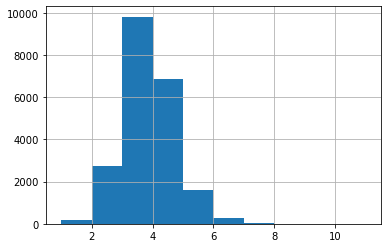

bathrooms


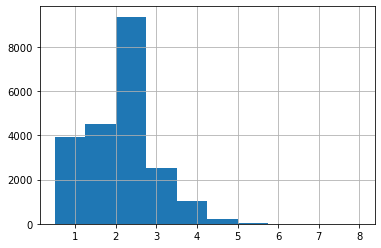

sqft_living


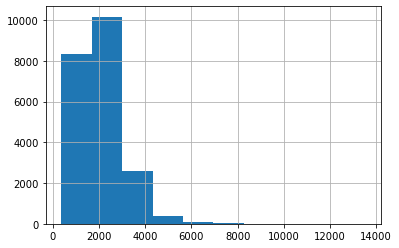

sqft_lot


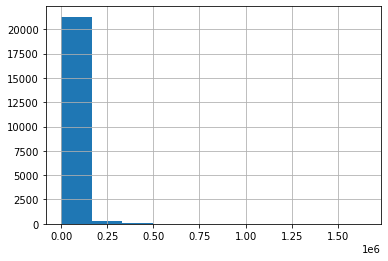

floors


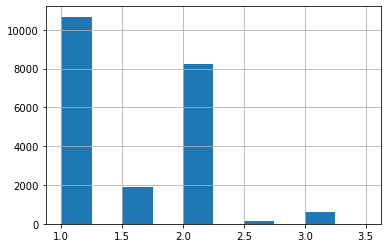

waterfront


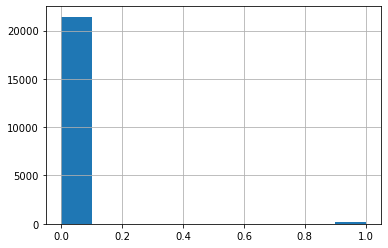

view


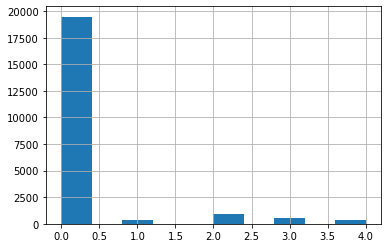

condition


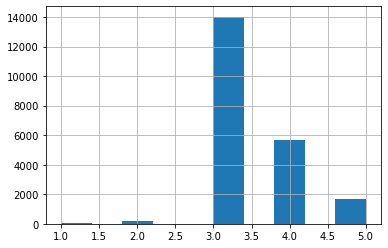

grade


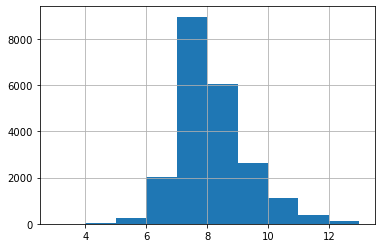

sqft_above


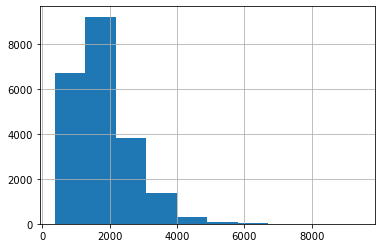

sqft_basement


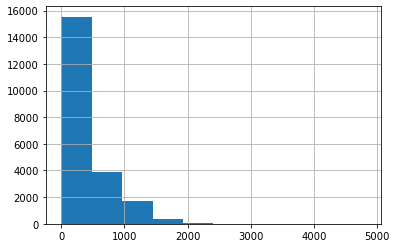

yr_built


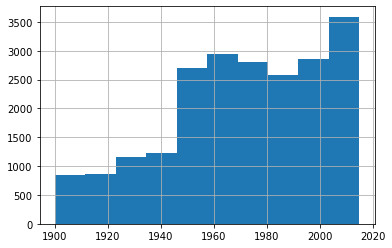

yr_renovated


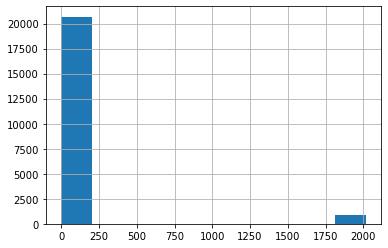

zipcode


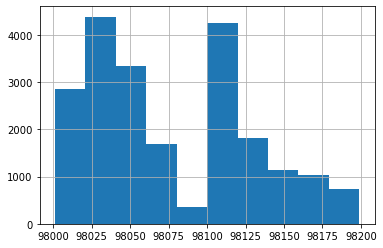

lat


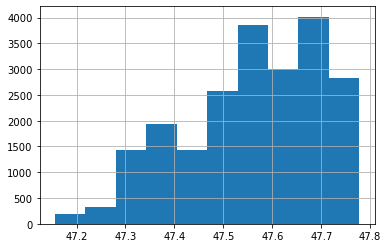

long


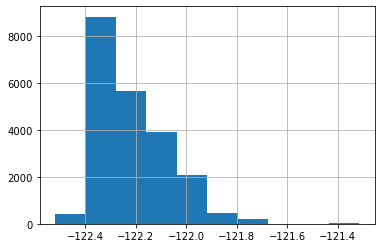

sqft_living15


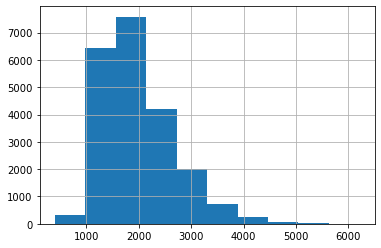

sqft_lot15


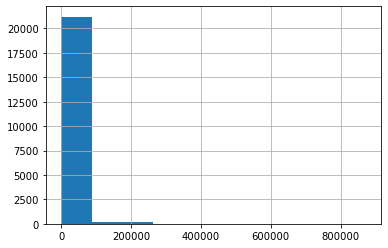

price


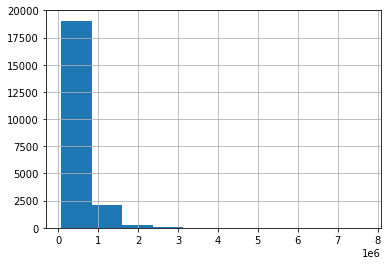

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [34]:
list(map(plot_hist,home.columns))
# grade,sqft_above,sqft_basement,long,sqft_living15
    # see if you can make them look closer to a normal distribution using r^2 or logs 

# BOXPLOTS
- clean out all the outliers exclude the columns with ratings use the example that if it has more than a ceratin number of values its a categorical   
- look at week 10 ]
- looks at lesson self guided 
    - make a map function for each individual column 


In [35]:
def plot_hist(x): 
    print(x)
    plt.boxplot(home[x])
    plt.show()

bedrooms


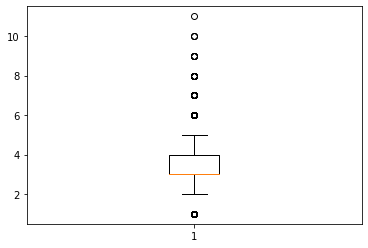

bathrooms


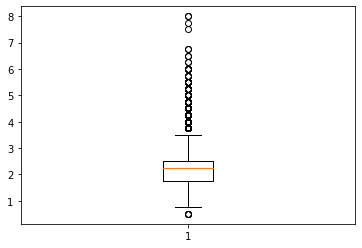

sqft_living


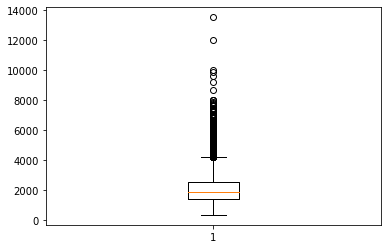

sqft_lot


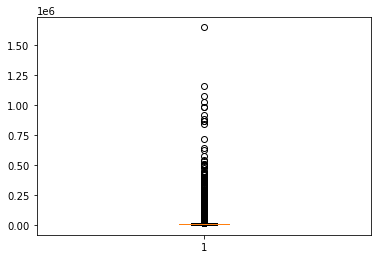

floors


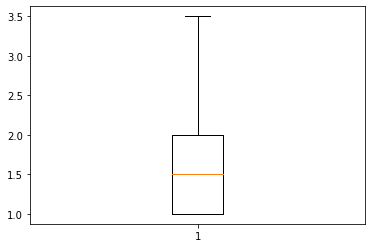

waterfront


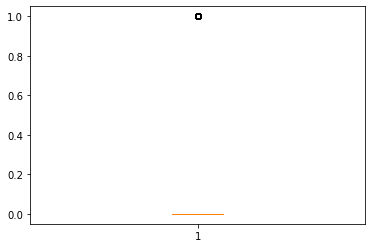

view


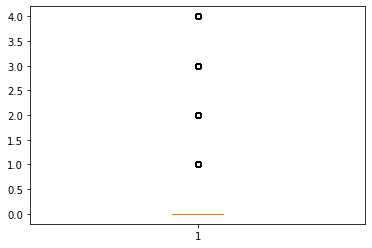

condition


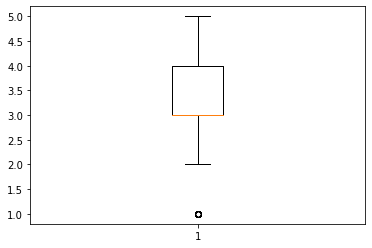

grade


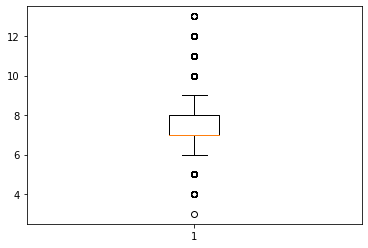

sqft_above


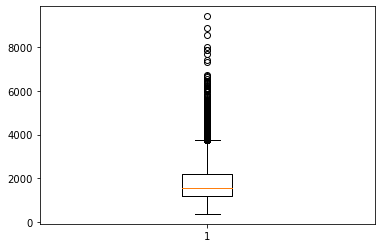

sqft_basement


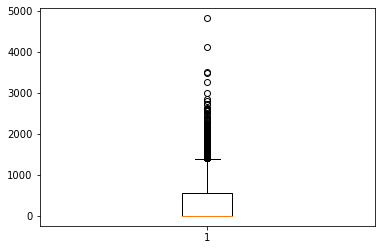

yr_built


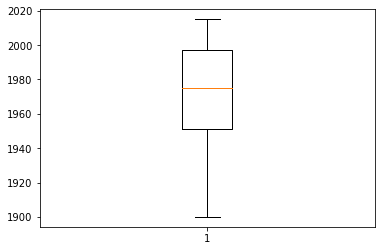

yr_renovated


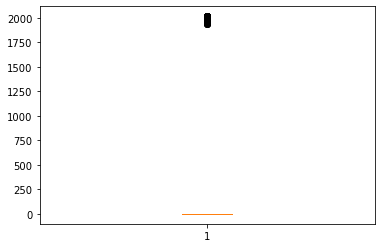

zipcode


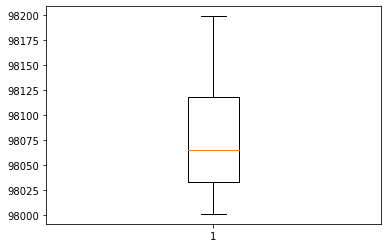

lat


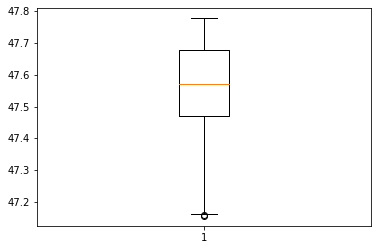

long


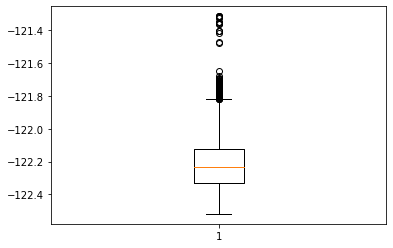

sqft_living15


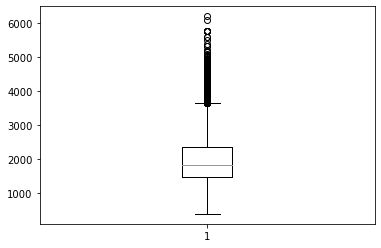

sqft_lot15


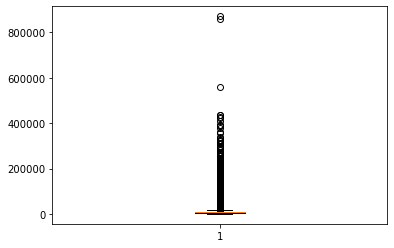

price


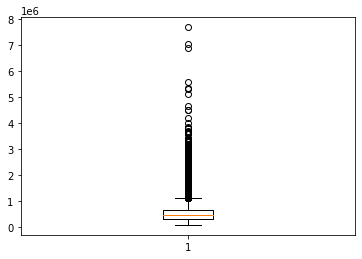

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [36]:
# probably best to do them individually then remove the outliers 
list(map(plot_hist,(home.select_dtypes(np.number).columns)))


In [37]:
home.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [38]:
home['bathrooms'].shape

(21596,)

In [39]:
home['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

bathrooms


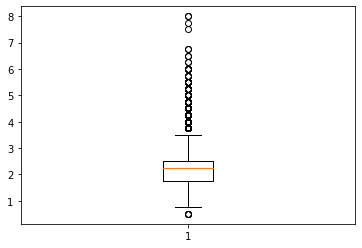

In [40]:
plot_hist('bathrooms')

#note 
- for bathrooms it might be best just to apply a filter instead of using the iqr method 
- also practice changing the 1.5 to see how it changes what values are included 

In [42]:
iqr = np.percentile(home['bathrooms'],75)-np.percentile(home['bathrooms'],25) 
upper_limit = np.percentile(home['bathrooms'],75)+1.5*iqr
lower_limit = np.percentile(home['bathrooms'],25)-1.5*iqr
home = home[(home['bathrooms']<upper_limit) & (home['bathrooms']>lower_limit)] #storing a dataframe into a column 

#filtering on one column but you are storing the results in a datframe and not just a column 
# the left hand side should match the right hand side 

In [43]:
home['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
0.75      71
1.25       9
Name: bathrooms, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc3bcb6fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc3bcb6f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc3c362550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdc3bcb65e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc3bcb62e0>],
 'means': []}

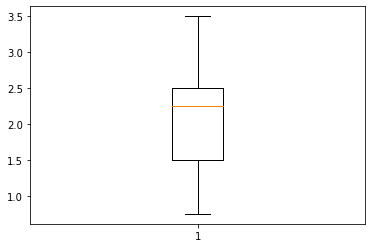

In [44]:
plt.boxplot(home['bathrooms'])

In [45]:
home['bathrooms'].boxplot() --- gives the error 'Series' object has no attribute 'boxplot'
#bathrooms = home['bathrooms']
#pd.bathrooms.plot.box() 


df= pd.DataFrame(home,columns='bathrooms')
ax=df.plot.box()


SyntaxError: invalid syntax (<ipython-input-45-5c1f1b726622>, line 1)

In [46]:
---------------------------------------------------

SyntaxError: invalid syntax (<ipython-input-46-fd35466592d0>, line 1)

price


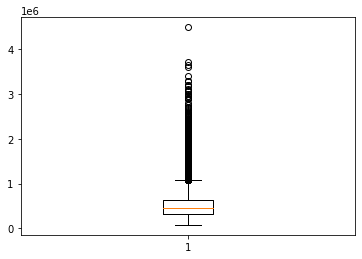

In [47]:
plot_hist('price')

In [48]:
iqr = np.percentile(home['price'],75)-np.percentile(home['price'],25) 
upper_limit = np.percentile(home['price'],75)+3*iqr
lower_limit = np.percentile(home['price'],25)-3*iqr
home = home[(home['price']<upper_limit) & (home['price']>lower_limit)]



In [49]:
home['price'].value_counts()

350000    171
450000    170
550000    156
500000    151
425000    150
         ... 
579100      1
230950      1
185900      1
443950      1
303100      1
Name: price, Length: 3447, dtype: int64

price


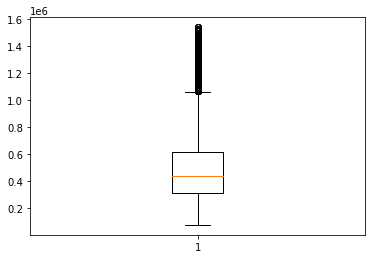

In [50]:
plot_hist('price')

### Cleaning sqft_lot

sqft_lot


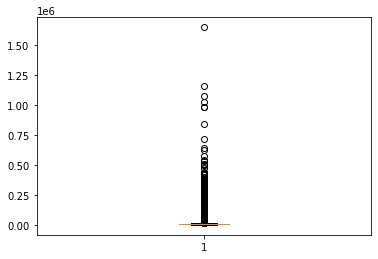

In [51]:
plot_hist('sqft_lot')

In [52]:
iqr = np.percentile(home['sqft_lot'],75)-np.percentile(home['sqft_lot'],25) 
upper_limit = np.percentile(home['sqft_lot'],75)+1.5*iqr
lower_limit = np.percentile(home['sqft_lot'],25)-1.5*iqr
home = home[(home['sqft_lot']<upper_limit) & (home['sqft_lot']>lower_limit)]


sqft_lot


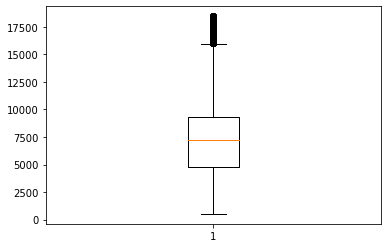

In [53]:
plot_hist('sqft_lot')

# Dropping Outliers 

   ## How to drop rows 
- ~ is for the removal of the row 
    - cleandata = cleandata[~cleandata['bedrooms'].isin([33])] 
    - cleandata.shape 


- cleandaata = cleandata.drop_duplicates(subset=['bedrooms','bathrooms'])

In [55]:
# check out the 33 bedrooms , major outlier 
home[home['bedrooms']==33] 
# drop this row using the above code

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [56]:
# drop the following row 
home = home[~home['bedrooms'].isin([33])]

In [57]:
# check to see if it has been removed from the data set 
home[home['bedrooms']==33] 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


### outliers to drop manually 
- try any zipcodes that fall outside of the city limits of seattle 
    -zipcode:90822 
    -zipcode:90845 
        -use the following syntax to remove these rows 
            - cleandata = cleandata[~cleandata['bedrooms'].isin([33])]
            - cleandata.shape

In [60]:
home.shape

(18486, 19)

## Correlation Matrix 
- anything above .8 for now needs to be removed 

In [61]:
correlation_matrix= X_num.corr() 
correlation_matrix

NameError: name 'X_num' is not defined

# note 
- does the date really matter ??? 
- either keep zipcode or lat and long since they basically do the same thing  
home = home.drop(['zipcode'],axis=1)

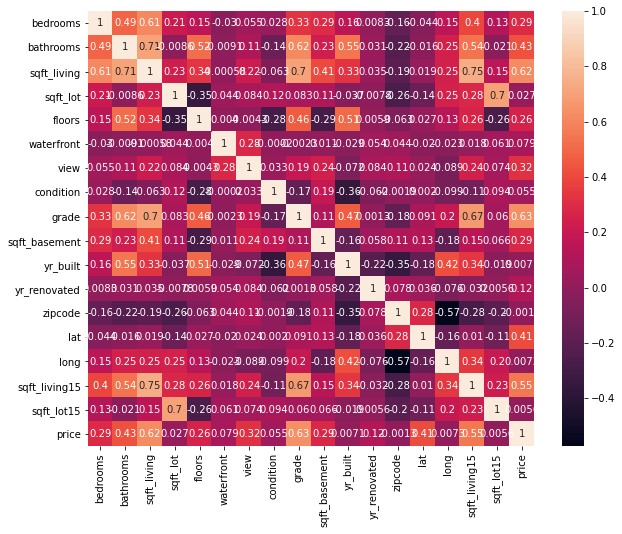

In [62]:
#'sqft_above'- removed 
home_corr = home[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price']]
corr_matrix = home_corr.corr(method = 'pearson')
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix,annot=True)
plt.show()

In [63]:
# high colinearlity 
    # sqft_above / sqft_living  
#home = home.drop(['sqft_above'],axis=1)
#the faster way to do this on a larger data set is to create a loop and filter any that have .8 and above 
     

# Basic correlation map 
- sns.heatmap(correlation_matrix,annot=True)
- plt.show() 

 

# Cleaning Finished ------------------------------------------------

## Scaling  
- check saturday nov 13 for reference 
- try any of the following 
    - numerical 
        - min max scaler 
        - standard scaler  
    - categorical 
        - onehotencoder 
        - createdummies 

In [64]:
home.shape

(18486, 19)

In [65]:
home_corr.shape

(18486, 18)

In [66]:
home_corr.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price'],
      dtype='object')

# Set Y here check to see if it has the correct number of rows now 

In [67]:
y = home_corr['price']

In [82]:
y.shape

(18486,)

In [83]:
# refer back to lesson 4.03_thursday
X_numerical = home_corr.drop(['price','zipcode'],axis = 1 ) 

In [85]:
X_numerical.shape

(18486, 16)

In [86]:
#***
X_numerical.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [87]:
# CHECK TO SEE WHY X HAS MORE THAN Y IN TERMS OF ROWS WAS Y NOT FILTERED AT THE RIGHT TIME ??

In [88]:
# this applies to everything ???
#your options include normalizer or min max scaler 
# when using this standardscaler all the null values must be removed to have this function 
from sklearn.preprocessing import StandardScaler
transformer= StandardScaler().fit(X_numerical)
x_standardized = transformer.transform(X_numerical)
X=x_standardized

In [89]:
#X is located here 

In [90]:
# below was not used currenlty using standardscaler 

In [91]:
from sklearn.preprocessing import MinMaxScaler 
transformer = MinMaxScaler().fit(numerical)
x_min_max = transformer.transform(numerical)


NameError: name 'numerical' is not defined

# Scaling categorical data types (use on classification problem) 

- encoded_df= pd.get_dummies(categorical) 
    - remember to concatenate the numerical and categorical afterward 
        - categorical=home.select_dtypes(np.object) 
        - scaled_df = pd.DataFrame(x_standardized) 
        - X=pd.concat([scaled_df,encoded_df],axis=1)

In [92]:
X_numerical.shape

(18486, 16)

# Checking X and Y

In [93]:
#check above for X that has already been scaled  
# got this form numcorr

In [94]:
y.shape

(18486,)

In [95]:
X.shape

(18486, 16)

# Train Test Split 

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=100)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([373261.81200811, 611062.65914101, 223069.14100825, ...,
       546850.60306897, 517950.63132885, 640480.59769727])

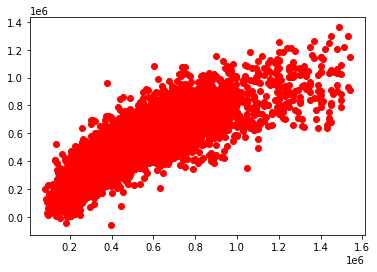

In [97]:
# what went wrong ????
plt.scatter(y_test,y_pred,color='red')
plt.show()

In [103]:
reg= LinearRegression().fit(X,y)
reg.score(X,y)

0.7034079094279979

# Methods of testing the accuracy of the model 

In [98]:
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred)) 
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2',metrics.r2_score(y_test,y_pred))

mean absolute error: 94204.23605863182
mean squared error: 16764557933.545631
Root mean squared error: 129478.0210442901
r2 0.7025591330240206


# KNN

In [101]:
from sklearn.neighbors import KNeighborsRegressor 
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train,y_train)


predictions = model.predict(X_test)
score = model.score(X_test,y_test)

from sklearn import linear_model 
from sklearn.metrics import r2_score 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
r2_score(y_test,predictions)


0.7754949817638522

Text(0, 0.5, 'Accuracy')

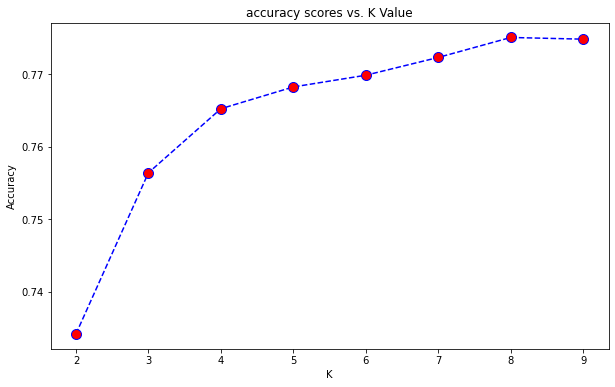

In [102]:
from sklearn.neighbors import KNeighborsRegressor
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')


# MLPRegressor 

In [105]:
from sklearn.neural_network import MLPRegressor 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split  
X,y = make_regression(n_samples = 200, random_state = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 1)
regr=MLPRegressor(random_state = 1, max_iter=500).fit(X_train,y_train)

In [106]:
regr.predict(X_test[:2])
regr.score(X_test,y_test )

0.4162338898076593